<h1> 505 Final Project</h1>

Notebook by: Matt Ammirati

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


In [130]:


product_info_df = pd.read_csv('/Users/mattammirati/Desktop/Matts505FinalProject/datasets/product_info (1).csv')

In [ ]:
csv_folder = '/Users/mattammirati/Downloads'

# List of file names
csv_files = [
    'reviews_0-250.csv',
    'reviews_250-500.csv',
    'reviews_500-750.csv',
    'reviews_750-1250.csv',
    'reviews_1250-end.csv'
]


csv_files = [os.path.join(csv_folder, file) for file in csv_files]

# Read and concatenate all CSV files
combined_reviews_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)




In [95]:
combined_reviews_df.shape


(1094411, 19)

In [96]:
product_info_df.shape

(8494, 27)

In [97]:
product_info_df.head(5)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scent', 'Woody & Earthy Scent', 'Fresh Scent']",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent', 'Warm &Spicy Scent']",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent', 'Warm &Spicy Scent']",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Women,Perfume,2,75.0,30.0


In [98]:
pd.set_option('display.max_columns', 10)

# Display the first 5 rows
combined_reviews_df.head()

# Reset the option back to default if needed
pd.reset_option('display.max_columns')

In [99]:
combined_reviews_df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [100]:
product_info_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [101]:
product_info_df.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [102]:
combined_reviews_df.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

<b>Start the cleaning process</b>

In [103]:
#impute where it makes sense with random values, drop the helpfullness column because too many missing values
#use the mode for the binary is recommended.
cleaned_combined_reviews = combined_reviews_df
cleaned_combined_reviews['review_text'] = combined_reviews_df['review_text'].fillna('No Review')
cleaned_combined_reviews = combined_reviews_df.drop(columns=['helpfulness'])
cleaned_combined_reviews['is_recommended'] = combined_reviews_df['is_recommended'].fillna(combined_reviews_df['is_recommended'].mode()[0])
cleaned_combined_reviews['review_title'] = combined_reviews_df['review_title'].fillna('No Title')
cleaned_combined_reviews['skin_tone'] = combined_reviews_df['skin_tone'].fillna('Unknown')
cleaned_combined_reviews['eye_color'] = combined_reviews_df['eye_color'].fillna('Unknown')
cleaned_combined_reviews['skin_type'] = combined_reviews_df['skin_type'].fillna('Unknown')
cleaned_combined_reviews['hair_color'] = combined_reviews_df['hair_color'].fillna('Unknown')


In [110]:
cleaned_combined_reviews.isnull().sum()

Unnamed: 0                  0
author_id                   0
rating                      0
is_recommended              0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
submission_time             0
review_text                 0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_id                  0
product_name                0
brand_name                  0
price_usd                   0
review_category             0
sentiment                   0
dtype: int64

<b>Use this cleaned data frame to pull the data that we need to identify common good factors and common bad factors</b>

In [105]:
# Define good and bad reviews
cleaned_combined_reviews['review_category'] = cleaned_combined_reviews['rating'].apply(
    lambda x: 'good' if x >= 4 else ('bad' if x <= 2 else 'neutral')
)

# Separate the data into good and bad reviews
good_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'good']
bad_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'bad']
20

In [106]:
# Summary for good reviews by price summary stats
print(good_reviews[['price_usd']].describe())

# Summary for bad reviews by price summary stats
print(bad_reviews[['price_usd']].describe())

           price_usd
count  898340.000000
mean       49.227741
std        39.637330
min         3.000000
25%        26.000000
50%        39.000000
75%        64.000000
max      1900.000000
           price_usd
count  114255.000000
mean       46.735717
std        41.719211
min         3.000000
25%        24.000000
50%        38.000000
75%        58.000000
max      1900.000000


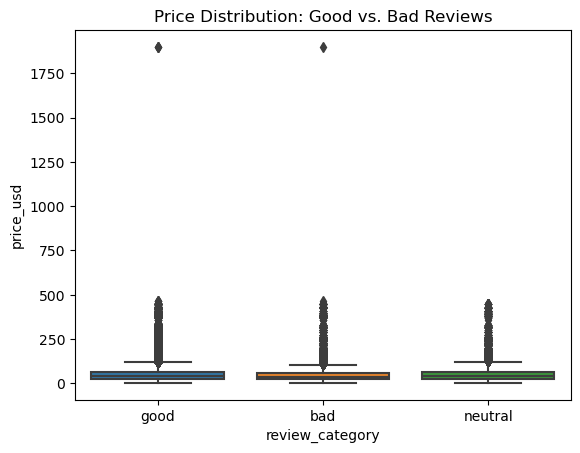

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price comparison between good and bad reviews
sns.boxplot(x='review_category', y='price_usd', data=cleaned_combined_reviews)
plt.title('Price Distribution: Good vs. Bad Reviews')
plt.show()

Price alone does not seem to be a strong factor in determining whether a product gets good or bad reviews, as the price distributions for all categories are very similar.

<b>To Further determine Good or bad factors with in the reviewed data, perform sentiment analysis on the text data.</b>

In [112]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mattammirati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
from textblob import TextBlob

# Apply sentiment analysis - assign a polarity value from the review_text column
cleaned_combined_reviews['sentiment'] = cleaned_combined_reviews['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Recreate good and bad reviews after the sentiment column is added
good_reviews = cleaned_combined_reviews[cleaned_combined_reviews['rating'] > 3]
bad_reviews = cleaned_combined_reviews[cleaned_combined_reviews['rating'] <= 3]

# Compare sentiment for good and bad reviews
print("Average Sentiment for Good Reviews:", good_reviews['sentiment'].mean())
print("Average Sentiment for Bad Reviews:", bad_reviews['sentiment'].mean())


Average Sentiment for Good Reviews: 0.26867698719464767
Average Sentiment for Bad Reviews: 0.09995091820932907


In [56]:
cleaned_combined_reviews.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd',
       'review_category', 'sentiment'],
      dtype='object')

In [57]:
cleaned_combined_reviews.isnull().sum()

Unnamed: 0                  0
author_id                   0
rating                      0
is_recommended              0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
submission_time             0
review_text                 0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_id                  0
product_name                0
brand_name                  0
price_usd                   0
review_category             0
sentiment                   0
dtype: int64

In [58]:
cleaned_combined_reviews['sentiment'].head(5)

0    0.090000
1   -0.062500
2    0.142045
3    0.087058
4    0.483333
Name: sentiment, dtype: float64

In [59]:
# Split the data into good and bad reviews
good_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'good']
bad_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'bad']

# Calculate and print the average sentiment for good reviews
average_good_sentiment = good_reviews['sentiment'].mean()
print("Average Sentiment for Good Reviews:", average_good_sentiment)

# Calculate and print the average sentiment for bad reviews
average_bad_sentiment = bad_reviews['sentiment'].mean()
print("Average Sentiment for Bad Reviews:", average_bad_sentiment)


Average Sentiment for Good Reviews: 0.2691130206296367
Average Sentiment for Bad Reviews: 0.0418918887153138


/Users/mattammirati/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


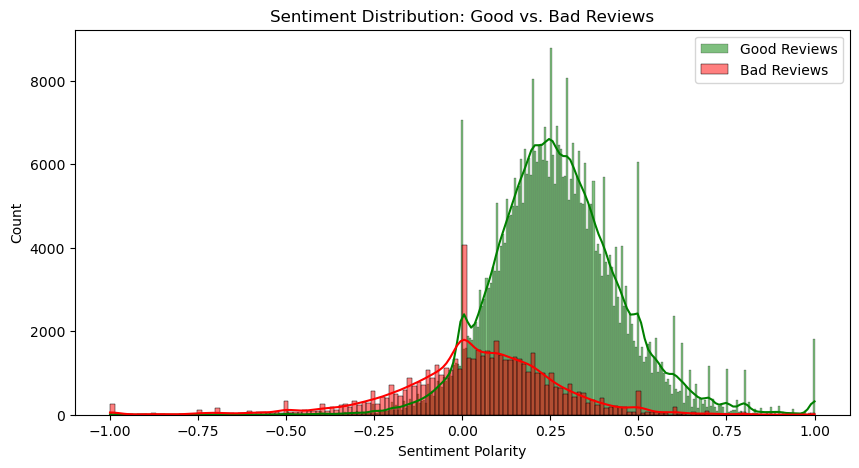

In [60]:
plt.figure(figsize=(10,5))
sns.histplot(good_reviews['sentiment'], color='green', label='Good Reviews', kde=True)
sns.histplot(bad_reviews['sentiment'], color='red', label='Bad Reviews', kde=True)
plt.title('Sentiment Distribution: Good vs. Bad Reviews')
plt.xlabel('Sentiment Polarity')
plt.legend()
plt.show()

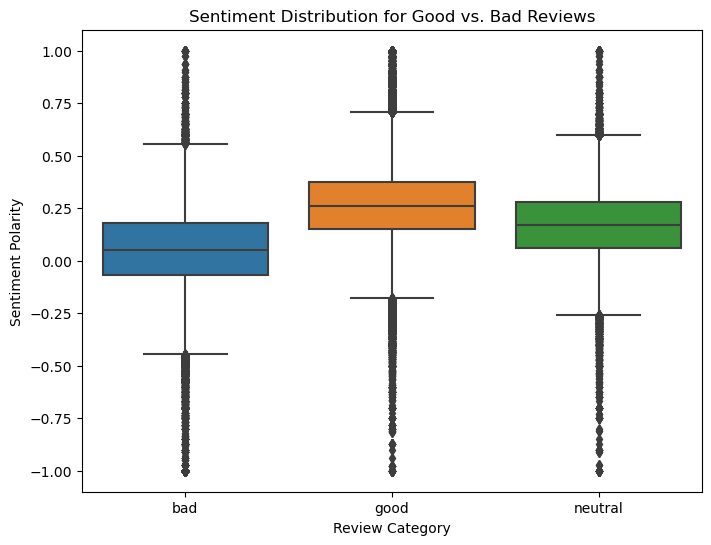

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='review_category', y='sentiment', data=cleaned_combined_reviews)
plt.title('Sentiment Distribution for Good vs. Bad Reviews')
plt.xlabel('Review Category')
plt.ylabel('Sentiment Polarity')
plt.show()


Based on our sentiment analysis, this means that there is average sentiment for good and bad reviews. Essentially this means that there isn't extraordinary language used on the good reviews or bad. They are mild reviews in both cases.  The range is -1 bad sentiment to positive 1 good sentiment. Since the sentiment for bad reviews is .04 that means that even the bad reviews are leaning towards neutral rather than bad. 

To further gather insight from the review_text category, keyword analysis will be used

In [68]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Download stopwords from NLTK if necessary
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean the text (remove special characters, stopwords, and lowercase everything)
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the 'review_text' column
cleaned_combined_reviews['cleaned_review_text'] = cleaned_combined_reviews['review_text'].apply(clean_text)

# Separate good and bad reviews based on the 'review_category' column
good_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'good']
bad_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'bad']

# Define the vectorizer to get unigrams, bigrams, and trigrams or single words, 2 word and three word scenarios
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english', max_features=100)  # Adjust max_features as needed

# Apply the vectorizer separately to good and bad reviews
good_phrases = vectorizer.fit_transform(good_reviews['cleaned_review_text']).toarray()
bad_phrases = vectorizer.fit_transform(bad_reviews['cleaned_review_text']).toarray()

# Get the vocabulary (most common words/phrases)
good_feature_names = vectorizer.get_feature_names_out()
bad_feature_names = vectorizer.get_feature_names_out()

#Count the frequency of each phrase for good and bad reviews
good_phrase_counts = good_phrases.sum(axis=0)  # Sum of each phrase's occurrence in good reviews
bad_phrase_counts = bad_phrases.sum(axis=0)  # Sum of each phrase's occurrence in bad reviews

#Create a DataFrame to compare phrases between good and bad reviews
phrase_comparison_df = pd.DataFrame({
    'phrase': good_feature_names,
    'good_reviews_count': good_phrase_counts,
    'bad_reviews_count': bad_phrase_counts
})

# Calculate the difference between how common the phrase is in good vs. bad reviews
phrase_comparison_df['difference'] = phrase_comparison_df['good_reviews_count'] - phrase_comparison_df['bad_reviews_count']

# Sort the phrases based on the difference in frequency
phrase_comparison_df = phrase_comparison_df.sort_values(by='difference', ascending=False)

# Display the most common phrases in good and bad reviews, and the difference in frequency
print("Top 10 Phrases More Common in Good Reviews:")
print(phrase_comparison_df.head(10))

print("\nTop 10 Phrases More Common in Bad Reviews:")
print(phrase_comparison_df.tail(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattammirati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Phrases More Common in Good Reviews:
       phrase  good_reviews_count  bad_reviews_count  difference
80       sure              573139               3228      569911
68        say              278082               2489      275593
51        new              201504               2656      198848
93      wasnt              168758               2542      166216
44       make              150570               3825      146745
95        way              141884               3897      137987
23        eye              137258               5390      131868
70  sensitive              128964               5743      123221
35      great              100955               4621       96334
40     little               98068               3910       94158

Top 10 Phrases More Common in Bad Reviews:
     phrase  good_reviews_count  bad_reviews_count  difference
86      try               28318               5811       22507
0      acne               27493               5193       22300
45   mak

Do the same for phrases

In [114]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Download stopwords from NLTK
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the 'review_text' column
cleaned_combined_reviews['cleaned_review_text'] = cleaned_combined_reviews['review_text'].apply(clean_text)

# Separate good and bad reviews based on the 'review_category' column
good_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'good']
bad_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'bad']

vectorizer = CountVectorizer(ngram_range=(3, 4), stop_words='english', max_features=100)  # Adjust max_features as needed

# Apply the vectorizer separately to good and bad reviews
good_phrases = vectorizer.fit_transform(good_reviews['cleaned_review_text']).toarray()
good_feature_names = vectorizer.get_feature_names_out()

bad_phrases = vectorizer.fit_transform(bad_reviews['cleaned_review_text']).toarray()
bad_feature_names = vectorizer.get_feature_names_out()

good_phrase_counts = good_phrases.sum(axis=0)  # Sum of each phrase's occurrence in good reviews
bad_phrase_counts = bad_phrases.sum(axis=0)  # Sum of each phrase's occurrence in bad reviews

#different df for different review features
good_phrase_df = pd.DataFrame({
    'phrase': good_feature_names,
    'count': good_phrase_counts
})

bad_phrase_df = pd.DataFrame({
    'phrase': bad_feature_names,
    'count': bad_phrase_counts
})

# Sort phrases by frequency
good_phrase_df = good_phrase_df.sort_values(by='count', ascending=False)
bad_phrase_df = bad_phrase_df.sort_values(by='count', ascending=False)

# Display
print("Top 10 Phrases in Good Reviews:")
print(good_phrase_df.head(20))

print("\nTop 10 Phrases in Bad Reviews:")
print(bad_phrase_df.head(20))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattammirati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Phrases in Good Reviews:
                            phrase  count
20                   goes long way  35504
40                little goes long  27163
41            little goes long way  26358
33             leaves skin feeling  18368
46                 makes skin feel  17891
65  received product complimentary  16715
68           received product free  16026
1                  acne prone skin  12399
14          exchange honest review  11037
43                  love love love   8125
76               skin care routine   7532
37               left skin feeling   6220
13              dry sensitive skin   6096
84               skin feeling soft   5963
48                 makes skin look   5959
22        highly recommend product   5959
0          absolutely love product   5599
87                 skin feels soft   5469
30              leave skin feeling   5393
26               ive using product   5118

Top 10 Phrases in Bad Reviews:
                            phrase  count
65          

<b>The above shows the most common phrases in good and bad, next connect them to the corresponding product.</b>

In [72]:


# Clean again
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

cleaned_combined_reviews['cleaned_review_text'] = cleaned_combined_reviews['review_text'].apply(clean_text)

vectorizer = CountVectorizer(ngram_range=(3, 4), stop_words='english', max_features=100)

all_phrases = vectorizer.fit_transform(cleaned_combined_reviews['cleaned_review_text']).toarray()
feature_names = vectorizer.get_feature_names_out()

phrase_df = pd.DataFrame(all_phrases, columns=feature_names)
cleaned_combined_reviews = pd.concat([cleaned_combined_reviews, phrase_df], axis=1)

# Here is where they are grouped with their corresponding product
product_phrases = cleaned_combined_reviews.groupby('product_name')[feature_names].sum()

good_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'good']
bad_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'bad']

good_product_phrases = good_reviews.groupby('product_name')[feature_names].sum()
bad_product_phrases = bad_reviews.groupby('product_name')[feature_names].sum()

#display
print("Most Common Good Review Phrases for Each Product:")
print(good_product_phrases.head(10))

print("\nMost Common Bad Review Phrases for Each Product:")
print(bad_product_phrases.head(10))



Most Common Good Review Phrases for Each Product:
                                                                          absolutely love product  \
product_name                                                                                        
"B" Oil                                                                                         0   
"Buffet" + Copper Peptides 1%                                                                   0   
(Re) Setting Refreshing Mist SPF 40                                                             1   
(Re)setting 100% Mineral Powder Sunscreen SPF 35 PA+++                                          0   
+Retinol Vitamin C Moisturizer                                                                  2   
1% Vitamin A Retinol Serum                                                                      2   
10 + 10 Moisturizer with 10% Vitamin C + 10% Peptide Complex + Ceramides                        2   
10 Day Results Kit                       

<b> Most Common Reviews per product </b>

In [115]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

# Function to clean the text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply text cleaning function
cleaned_combined_reviews['cleaned_review_text'] = cleaned_combined_reviews['review_text'].apply(clean_text)

# Vectorizer to extract n-grams
vectorizer = CountVectorizer(ngram_range=(3, 4), stop_words='english', max_features=100)

# Transform the cleaned text into n-gram counts
all_phrases = vectorizer.fit_transform(cleaned_combined_reviews['cleaned_review_text']).toarray()
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for the n-gram phrases
phrase_df = pd.DataFrame(all_phrases, columns=feature_names)

# Concatenate the n-gram phrases with the original DataFrame
cleaned_combined_reviews = pd.concat([cleaned_combined_reviews, phrase_df], axis=1)

# Group the data by product name
product_phrases = cleaned_combined_reviews.groupby('product_name')[feature_names].sum()

# Filter reviews by category (good and bad)
good_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'good']
bad_reviews = cleaned_combined_reviews[cleaned_combined_reviews['review_category'] == 'bad']

# Group by product name and sum the n-grams for good and bad reviews
good_product_phrases = good_reviews.groupby('product_name')[feature_names].sum()
bad_product_phrases = bad_reviews.groupby('product_name')[feature_names].sum()

# Define a threshold for the number of occurrences of phrases
phrase_threshold = 5

# Function to display the most common phrases
def display_common_phrases(df, threshold):
    # Iterate over each product
    for product in df.index:
        print(f"\nProduct: {product}")
        # Filter out phrases that occur less than the threshold
        common_phrases = df.loc[product][df.loc[product] >= threshold]
        # Sort the phrases by their frequency
        common_phrases = common_phrases.sort_values(ascending=False)
        if not common_phrases.empty:
            print(common_phrases)
        else:
            print("No common phrases above the threshold.")

# Display most common good review phrases for each product
print("\nMost Common Good Review Phrases for Each Product:")
display_common_phrases(good_product_phrases, phrase_threshold)

# Display most common bad review phrases for each product
print("\nMost Common Bad Review Phrases for Each Product:")
display_common_phrases(bad_product_phrases, phrase_threshold)



Most Common Good Review Phrases for Each Product:

Product: "B" Oil
goes long way           7
little goes long        7
little goes long way    6
love love love          5
Name: "B" Oil, dtype: int64

Product: "Buffet" + Copper Peptides 1%
No common phrases above the threshold.

Product: (Glow)Setting 100% Mineral Powder SPF 35
received product complimentary    7
Name: (Glow)Setting 100% Mineral Powder SPF 35, dtype: int64

Product: (Re) Setting Refreshing Mist SPF 40
received product complimentary    10
Name: (Re) Setting Refreshing Mist SPF 40, dtype: int64

Product: (Re)setting 100% Mineral Powder Sunscreen SPF 35 PA+++
exchange honest review            13
received product complimentary     9
Name: (Re)setting 100% Mineral Powder Sunscreen SPF 35 PA+++, dtype: int64

Product: +Retinol Vita C Power Serum
No common phrases above the threshold.

Product: +Retinol Vitamin C Moisturizer
received product free                10
complimentary testing purposes        9
received product comp

<b> Add products with corresponding phrases using KMeans </b>

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_product_phrases = scaler.fit_transform(product_phrases)

kmeans = KMeans(n_clusters=3, random_state=42)
product_clusters = kmeans.fit_predict(scaled_product_phrases)

product_phrases['cluster'] = product_clusters

print(product_phrases[['cluster']])

product_phrases[['cluster']].to_csv('product_clusters.csv', index=True)


                                                            cluster
product_name                                                       
"B" Oil                                                           1
"Buffet" + Copper Peptides 1%                                     1
(Re) Setting Refreshing Mist SPF 40                               1
(Re)setting 100% Mineral Powder Sunscreen SPF 35 PA+++            1
+Retinol Vitamin C Moisturizer                                    2
...                                                             ...
Yo Detox Charcoal Face & Body Enzyme Scrub                        0
Zincscreen 100% Mineral Sunscreen Lotion SPF 40 PA+++             1
barrier+ Triple Lipid + Collagen Brightening Eye Treatment        1
goopglow Cloudberry Exfoliating Jelly Cleanser                    2
pores no more Vacuum Cleaner Pore Purifying Mask                  1

[993 rows x 1 columns]


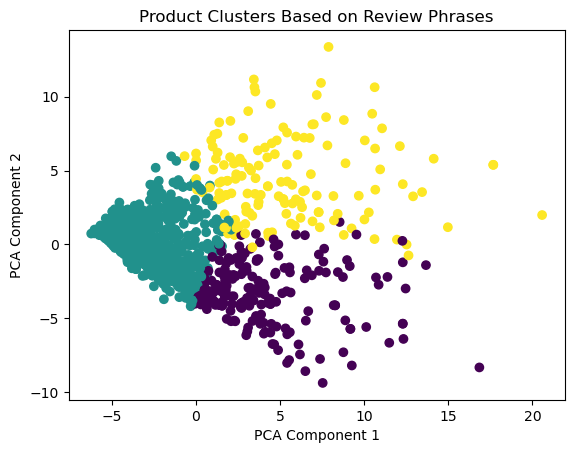

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_product_phrases)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=product_clusters, cmap='viridis')
plt.title('Product Clusters Based on Review Phrases')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

<b> Clustering products using TFID </b>

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
X = vectorizer.fit_transform(cleaned_combined_reviews['cleaned_review_text'])

# Group the review vectors by product
product_reviews = cleaned_combined_reviews.groupby('product_name')['cleaned_review_text'].apply(lambda x: ' '.join(x))

# Vectorize the combined product reviews
product_X = vectorizer.transform(product_reviews)

#Kmeans
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
kmeans.fit(product_X)

# Add cluster labels to the product_reviews dataframe
product_reviews_df = pd.DataFrame(product_reviews)
product_reviews_df['cluster'] = kmeans.labels_


print("Clustered Products:")
print(product_reviews_df.head())


for cluster in range(5):
    print(f"\nProducts in Cluster {cluster}:")
    print(product_reviews_df[product_reviews_df['cluster'] == cluster].index.tolist())


Clustered Products:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

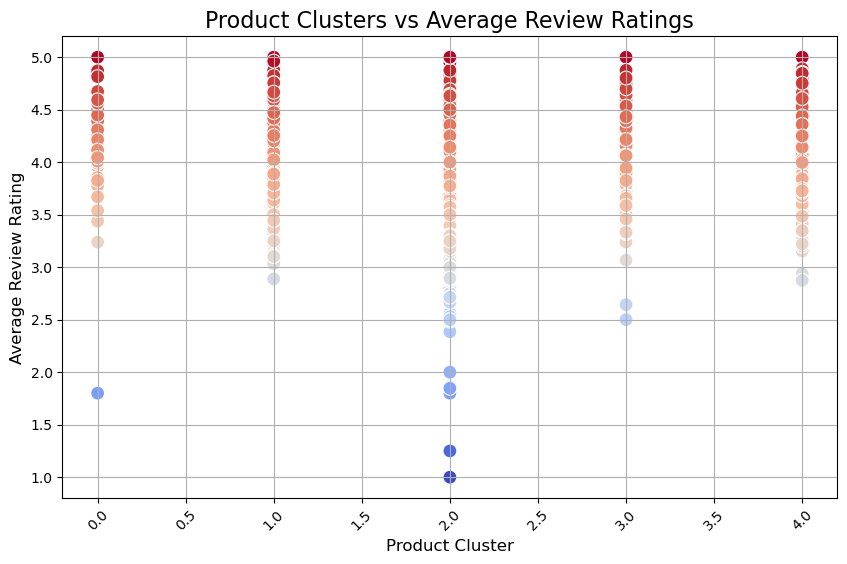

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate average rating or sentiment per product
product_ratings = cleaned_combined_reviews.groupby('product_name')['rating'].mean()  # Or 'sentiment' if using sentiment analysis

# Combine the product reviews DataFrame with the ratings/sentiment DataFrame
product_reviews_df['average_rating'] = product_ratings

# Plot the clusters and their corresponding average ratings/sentiments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_reviews_df, x='cluster', y='average_rating', hue='average_rating', palette='coolwarm', s=100, legend=None)

# Adding titles and labels
plt.title('Product Clusters vs Average Review Ratings', fontsize=16)
plt.xlabel('Product Cluster', fontsize=12)
plt.ylabel('Average Review Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# combine reviews by user
user_reviews = cleaned_combined_reviews.groupby('author_id')['cleaned_review_text'].apply(lambda x: ' '.join(x))

# Vectorize user reviews using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
user_X = vectorizer.fit_transform(user_reviews)

# Apply KMeans clustering to group similar users
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
user_clusters = kmeans.fit_predict(user_X)


user_reviews_df = pd.DataFrame(user_reviews)
user_reviews_df['cluster'] = user_clusters

#
print("Clustered Users:")
print(user_reviews_df.head())

# Check which products users in each cluster have reviewed
for cluster in range(5):
    print(f"\nUsers in Cluster {cluster}:")
    users_in_cluster = user_reviews_df[user_reviews_df['cluster'] == cluster].index.tolist()
    reviewed_products = cleaned_combined_reviews[cleaned_combined_reviews['author_id'].isin(users_in_cluster)]['product_name'].unique()
    print(f"Products reviewed by users in cluster {cluster}: {reviewed_products}")


Clustered Users:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             cleaned_review_text  \
author_id                                                                                                                                                                                                                                                                                          

<b> Visualize the clustering of users by review </b>

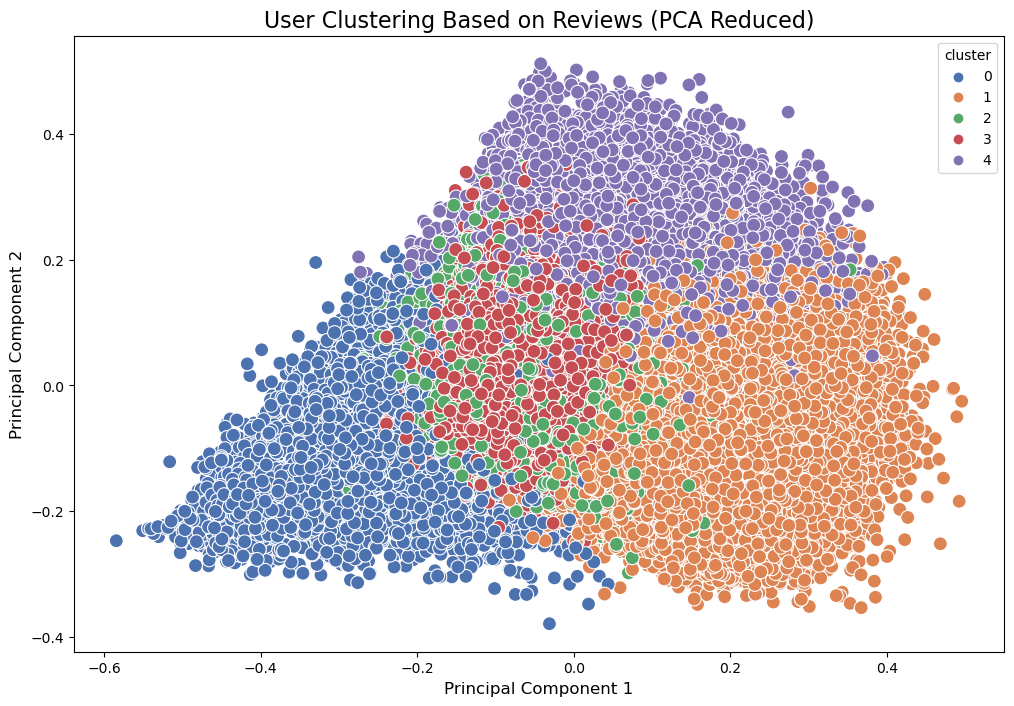

In [126]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#Apply PCA for 2D visualization of user clusters
pca = PCA(n_components=2)
user_X_pca = pca.fit_transform(user_X.toarray())  # Convert sparse matrix to dense array

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(user_X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = user_clusters
pca_df['author_id'] = user_reviews.index

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='deep', s=100, legend="full")

# Add titles and labels
plt.title('User Clustering Based on Reviews (PCA Reduced)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.show()


<b>Use Naive Bayes to predict which cluster a user belongs to</b>

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


X = user_X.toarray()  # TF-IDF vectorized user reviews (features)
y = user_clusters      # Cluster labels (target)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.76811677688426
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      9773
           1       0.74      0.76      0.75     53995
           2       0.95      0.35      0.51     22522
           3       0.72      0.91      0.80     71104
           4       0.95      0.77      0.85     16202

    accuracy                           0.77    173596
   macro avg       0.87      0.71      0.75    173596
weighted avg       0.79      0.77      0.76    173596

